# Input-output properties cells

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CircuitPath = '/home/fernando/CA1_netpyne/info/data-bbp/20191017/'
BioName = CircuitPath + 'bioname/'
Atlas = CircuitPath + 'atlas/'
MorphologyPath = CircuitPath + 'morphologies/swc/'
CellLibraryFile = CircuitPath + 'sonata/nodes/nodes_hippocampus.h5'
METypePath = CircuitPath + 'emodels/20190402/hoc/'
MEComboInfoFile = CircuitPath + 'emodels/20190402/mecombo_emodel.tsv'
UserTargetFile = CircuitPath + 'user.target'
StartTargetFile = CircuitPath + 'start.target'

In [3]:
from bluepysnap import Circuit
from bluepysnap.bbp import Cell
circuit_path = CircuitPath + 'circuit_config.json'
circuit = Circuit(circuit_path)
cells = circuit.nodes["hippocampus_neurons"]
cells_projections = circuit.nodes["hippocampus_projections"]
nodesinfo = cells.get()
nodesinfo_projections = cells_projections.get()

In [4]:
nodesinfo

,etype,layer,model_template,model_type,morph_class,morphology,mtype,region,rotation_angle_xaxis,rotation_angle_yaxis,rotation_angle_zaxis,synapse_class,x,y,z,@dynamics:holding_current,@dynamics:threshold_current
0,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc5;SLM,-0.000000,0.306704,-0.000000,INH,409.446689,525.218483,1074.146619,0.028962,0.224609
1,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc3;SLM,-3.141593,1.051681,-3.141593,INH,692.961402,511.187277,573.179832,0.028962,0.224609
2,bAC,SLM,hoc:CA1_int_bAC_011127HP1_2019032911561,biophysical,INT,011127HP1_-_Scale_x1.000_y0.850_z1.000,SLM_PPA,mc6;SLM,-3.141593,1.393882,-3.141593,INH,624.142630,520.641475,976.924721,0.028962,0.224609
3,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2,SR_SCA,mc5;SR,-3.141593,0.347655,-3.141593,INH,430.543380,411.999965,1180.185218,0.005140,0.341797
4,cAC,SR,hoc:CA1_int_cAC_990611HP2_2019032816214,biophysical,INT,990611HP2_-_Scale_x1.000_y1.050_z1.000,SR_SCA,mc5;SR,-0.000000,0.137277,-0.000000,INH,427.936977,302.239247,1013.453517,0.004947,0.341797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18193,cNAC,SO,hoc:CA1_int_cNAC_970717D_2019030718251,biophysical,INT,980120A,SO_BP,mc3;SO,-3.141593,1.303866,-3.141593,INH,771.381002,37.274531,231.992286,-0.011643,0.302734
18194,cNAC,SO,hoc:CA1_int_cNAC_970911C_2019030512040,biophysical,INT,980120A_-_Scale_x1.000_y1.150_z1.000,SO_BP,mc3;SO,0.000000,-1.070015,0.000000,INH,666.970306,58.551145,396.539067,-0.044198,0.449219
18195,cNAC,SO,hoc:CA1_int_cNAC_970911C_2019030512040,biophysical,INT,980120A_-_Scale_x1.000_y0.850_z1.000_-_Clone_0,SO_BP,mc0;SO,-3.141593,1.267531,-3.141593,INH,505.811537,130.131875,182.700052,-0.044335,0.439453
18196,cNAC,SO,hoc:CA1_int_cNAC_990111HP2_2019032915570,biophysical,INT,980120A_-_Scale_x1.000_y1.150_z1.000,SO_BP,mc4;SO,-0.000000,0.815231,-0.000000,INH,-68.542249,57.960736,940.564725,-0.001224,0.371094


In [196]:
gid_2neuronsMtype_central = [1, 3, 13513, 14311,18097, 18109, 18140, 18149, 18163, 18177, 16950, 16963, 17199, 17202, 
                    17411, 17416, 17486, 17497, 17946, 17958, 22, 25]

gid_2neuronsMtype_central = gid_2neuronsMtype_central - np.ones_like(gid_2neuronsMtype_central)

for gid in gid_2neuronsMtype_central:
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s %s %s \n       %s' % (mcName,layerName,cellName,MorphoName))
#     print(nodesinfo['mtype'][gid])

mc5 SLM CA1_int_bAC_011127HP1_2019032911561 
       011127HP1_-_Scale_x1.000_y0.850_z1.000.swc
mc6 SLM CA1_int_bAC_011127HP1_2019032911561 
       011127HP1_-_Scale_x1.000_y0.850_z1.000.swc
mc2 SP CA1_pyr_cACpyr_mpg141017_a1_2_idC_2019032814340 
       dend-oh140807_A0_idF_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.850_z1.000_-_Clone_12.swc
mc2 SP CA1_pyr_cACpyr_oh140807_A0_idF_2019030511545 
       dend-mpg141216_A_idA_axon-mpg141017_a1-2_idC_-_Scale_x1.000_y0.950_z1.000_-_Clone_4.swc
mc2 SO CA1_int_cAC_011017HP2_2019032814552 
       011017HP2_height_150.swc
mc2 SO CA1_int_cAC_011017HP2_2019032814552 
       011017HP2_height_195.swc
mc2 SO CA1_int_cNAC_970911C_2019030512040 
       011023HP2_-_Scale_x1.000_y1.050_z1.000.swc
mc2 SO CA1_int_cNAC_970509HP2_2019030511562 
       011023HP2_-_Scale_x1.000_y0.850_z1.000.swc
mc2 SO CA1_int_cAC_011017HP2_2019032814552 
       971114B_-_Scale_x1.000_y0.850_z1.000.swc
mc2 SO CA1_int_cAC_980120A_2019032816092 
       971114B_-_Scale_x1.000_y1.050

In [191]:
most_central_10_SP_PC = [11617, 6393, 6789, 6243, 13513, 14311, 9397, 3699, 12245, 12001]
most_central_10_SP_PC = most_central_10_SP_PC - np.ones_like(most_central_10_SP_PC)

# SO_OLM_cells = [18039, 18040, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18059, 18060, 18061, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18095, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18110, 18111, 18112, 18113, 18114, 18115, 18116, 18117, 18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126]
# SO_OLM_cells = SO_OLM_cells - np.ones_like(SO_OLM_cells)
# most_central_10_SP_PC = range(18198)

for gid in range(5):
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = METypePath + nodesinfo['model_template'][gid][4:] + '.hoc'
    cellName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    layerName = nodesinfo['region'][gid][4:]  
    print('%s %s %s \n       %s' % (mcName,layerName,cellName,MorphoName))

mc5 SLM CA1_int_bAC_011127HP1_2019032911561 
       011127HP1_-_Scale_x1.000_y0.850_z1.000.swc
mc3 SLM CA1_int_bAC_011127HP1_2019032911561 
       011127HP1_-_Scale_x1.000_y0.850_z1.000.swc
mc6 SLM CA1_int_bAC_011127HP1_2019032911561 
       011127HP1_-_Scale_x1.000_y0.850_z1.000.swc
mc5 SR CA1_int_cAC_990611HP2_2019032816214 
       990611HP2.swc
mc5 SR CA1_int_cAC_990611HP2_2019032816214 
       990611HP2_-_Scale_x1.000_y1.050_z1.000.swc


In [6]:
print('hoclist size =',np.size(list(cells.property_values(Cell.MODEL_TEMPLATE))))
print('Morpholist size =',np.size(list(cells.property_values(Cell.MORPHOLOGY))))

hoclist size = 36
Morpholist size = 646


In [7]:
!nrnivmodl mod/

/home/fernando/CA1_netpyne/sim
Mod files: "mod/cacummb.mod" "mod/cacumm.mod" "mod/cagk.mod" "mod/cal2.mod" "mod/can2.mod" "mod/cat.mod" "mod/DetAMPANMDA.mod" "mod/DetGABAAB.mod" "mod/h.mod" "mod/kadist.mod" "mod/kaprox.mod" "mod/kca.mod" "mod/kd2.mod" "mod/kdb.mod" "mod/kdrbca1.mod" "mod/kdrca1.mod" "mod/kmb.mod" "mod/na3n.mod" "mod/naxn.mod" "mod/ProbAMPANMDA_EMS.mod" "mod/ProbGABAAB_EMS.mod"

Creating x86_64 directory for .o files.

COBJS=''
 -> Compiling mod_func.c
gcc -O2   -I.   -I/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 -> NMODL ../mod//cacummb.mod
 -> NMODL ../mod//cacumm.mod
(cd "../mod"; MODLUNIT=/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/share/nrn/lib/nrnunits.lib /home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/bin/nocmodl cacummb.mod -o "/home/fernando/CA1_netpyne/sim/x86_64")
 -> NMODL ../mo

 -> Compiling can2.c
gcc -O2   -I"../mod" -I.   -I/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c can2.c -o can2.o
 -> Compiling cat.c
gcc -O2   -I"../mod" -I.   -I/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c cat.c -o cat.o
 -> Compiling DetAMPANMDA.c
gcc -O2   -I"../mod" -I.   -I/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c DetAMPANMDA.c -o DetAMPANMDA.o
 -> Compiling DetGABAAB.c
gcc -O2   -I"../mod" -I.   -I/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c DetGABAAB.c -o DetGABAAB.o
 -> Compiling h.c
gcc -O2   -I"../mod" -I.   -I/home/fernando/anaconda3/envs/netpynedev/lib/python3.7/site-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c h.c -o h.o
 

In [8]:
from cellwrapper import loadCell
cell = loadCell(cellName, MorphoName)
soma = cell.soma[0]

In [9]:
print (gid,nodesinfo['mtype'][gid],cell)

4 SR_SCA CA1_int_cAC_990611HP2_2019032816214[0]


In [30]:
# Options
durationstim = 400.0
delaystim = 531.0
timesimulation = 1131.0
ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
stimulus = neuron.h.IClamp(0.5, sec=soma)
stimulus.dur = durationstim # ms
stimulus.delay = delaystim  # ms   
step_number=7
stimulus.amp = ampstim[step_number]

Traces = []
TracesList = []

recordings = {}

recordings['time'] = neuron.h.Vector()
recordings['soma(0.5)'] = neuron.h.Vector()

recordings['time'].record(neuron.h._ref_t, 0.1)
recordings['soma(0.5)'].record(cell.soma[0](0.5)._ref_v, 0.1)

Vector[9]

Changed dt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

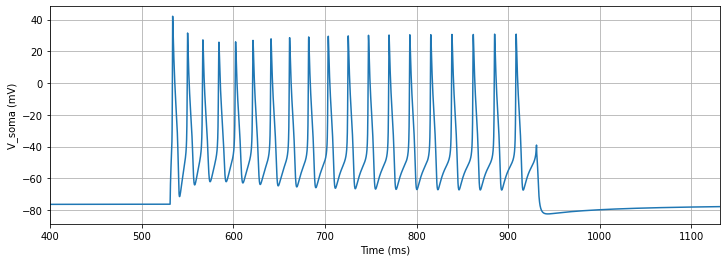

In [15]:
neuron.h.dt = 0.05
neuron.h.cvode_active(0)
neuron.h.tstop = timesimulation # ms
neuron.h.run();
        
time = np.array(recordings['time'])
soma_voltage = np.array(recordings['soma(0.5)'])

Traces.append(soma_voltage)
TracesList.append(list(soma_voltage))

# soma_voltage_filename = os.path.join(
#     'soma_voltage_step%d.dat' % (step_number))
# np.savetxt(soma_voltage_filename, soma_voltage)
# print('Soma voltage for step %d saved to: %s'
#         % (step_number, soma_voltage_filename))

fig = plt.figure(figsize=(12,4))

plt.plot(time,soma_voltage)
plt.xlabel('Time (ms)')
plt.ylabel('V_soma (mV)')
plt.xlim(400,timesimulation)
plt.grid(True)

# fig.savefig('{s1}/{s}_BBP_changingT.png'.format(s1=outFolder,s=folder[cellnumber]))

In [31]:
Traces = []
TracesList = []

for step_number in range(8):
    
    stimulus.amp = ampstim[step_number]
    
    neuron.h.run();
        
    time = np.array(recordings['time'])
    soma_voltage = np.array(recordings['soma(0.5)'])

    Traces.append(soma_voltage)
    TracesList.append(list(soma_voltage))
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

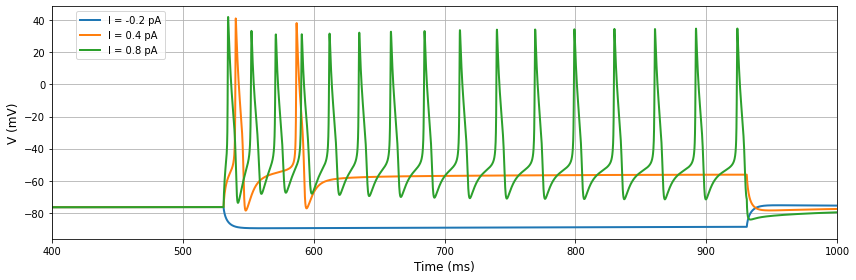

In [41]:
# plot both traces overlayed
fontsiz=12
figSize = (12,4)
fig = plt.figure(figsize=figSize)  # Open a new figure

for step_number in range(2,8,2):
    BBPTrace = Traces[step_number]
#     plt.subplot(8, 1, step_number+1)
    plt.plot(time[:len(BBPTrace)], BBPTrace, linewidth=2.0, label='I = %.1f pA'%(ampstim[step_number]))  # linestyle=':'
    plt.ylabel('V (mV)', fontsize=fontsiz)
#     plt.ylim(-85,50)
    plt.grid(True)
    plt.xlim(400,1000)
    plt.legend(loc='upper right', bbox_to_anchor=(0.15, 1.0))
plt.xlabel('Time (ms)', fontsize=fontsiz)
plt.ion()
plt.tight_layout()

In [12]:
list(cell.soma[0](0.5))

[ca_ion,
 cacum,
 k_ion,
 kca,
 cagk,
 cat,
 cal,
 can,
 hd,
 kap,
 kmb,
 kdb,
 ttx_ion,
 na_ion,
 na3,
 kdrb,
 pas]

In [13]:
print(cell.soma[0].ena,cell.soma[0].ek)

50.0 -90.0


In [16]:
from neuron import h, gui2
gui2.set_backend('jupyter')
# h.load_file('/home/fernando/CA1_netpyne/info/data-bbp/20191017/morphologies/swc/' + MorphoName)  
ps = gui2.PlotShape()
ps.variable('v')
ps.show(0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
%%capture
!pip install NeuroM[plotly]
%matplotlib inline

# Import neurom module
import neurom as nm
# Import neurom visualization module
from neurom import viewer
from neurom.view import plotly

neuronM = nm.load_neuron(MorphologyPath + MorphoName)

# Visualize a morphology in two dimensions
# fig, ax = plotly.draw(neuron, plane='xy', inline=True)
# Visualize a morphology in three dimensions
# fig, ax = plotly.draw(neuron, inline=True)
# Visualize a single tree in three dimensions
# fig, ax = plotly.draw(neuron.neurites[0], inline=True)
# Visualize the dendrogram of a morphology
# fig, ax = viewer.draw(neuron, mode='dendrogram')

In [25]:
fig, ax = plotly.draw(neuronM.neurites[1:], plane='xy', inline=True)

In [27]:
# fig, ax = viewer.draw(neuronM, mode='dendrogram')

In [28]:
# Extract the total number of neurites (basal and apical dendrites, and axons)
number_of_neurites = nm.get('number_of_neurites', neuronM)

# Extract the total number of sections
number_of_sections = nm.get('number_of_sections', neuronM)

# Extract the soma radius
soma_radius = neuronM.soma.radius

# Extract the number of sections per neurite
number_of_sections_per_neurite = nm.get('number_of_sections_per_neurite', neuronM)

# Print result
print("Neuron id          : {0} \n\
Number of neurites : {1} \n\
Soma radius        : {2:.2f} \n\
Number of sections : {3}".format(neuronM.name, number_of_neurites[0], soma_radius, number_of_sections[0]))
print()
print("Neurite type \t\t\t| Number of sections")
for i, neurite in enumerate(neuronM.neurites):    
    print("{0:31} | {1}".format(str(neurite.type), number_of_sections_per_neurite[i]))

Neuron id          : 990611HP2_-_Scale_x1.000_y1.050_z1.000 
Number of neurites : 5 
Soma radius        : 7.70 
Number of sections : 387

Neurite type 			| Number of sections
NeuriteType.axon                | 333
NeuriteType.basal_dendrite      | 9
NeuriteType.basal_dendrite      | 21
NeuriteType.basal_dendrite      | 21
NeuriteType.basal_dendrite      | 3


In [8]:
Morpholist_hoclist = []
cellNamelist = []
MENamelist = []
for gid in range(18198):    
    cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] 
    if cellName not in cellNamelist:
        cellNamelist.append(cellName)  
        
    MEName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]
    if MEName not in MENamelist:
        MENamelist.append(MEName)  

    MorphohocName = nodesinfo['morphology'][gid] + '__' + nodesinfo['model_template'][gid][4:]    
    if MorphohocName not in Morpholist_hoclist:
        Morpholist_hoclist.append(MorphohocName)           
         
            
MENumber = {}
for cellgid in MENamelist:    
    MENumber[cellgid] = 0     
    
cellNumber = {}
for cellgid in cellNamelist:    
    cellNumber[cellgid] = 0       
       
cellNumber_swc_hoc = {}
for cellgid in Morpholist_hoclist:    
    cellNumber_swc_hoc[cellgid] = 0

    
popNumber = {}
for popgid in Mtypelist:    
    popNumber[popgid] = 0 

for gid in range(18198):
    cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] 
    cellNumber[cellName] += 1 
    
    MEName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]
    MENumber[MEName] += 1 
    
    MorphohocName = nodesinfo['morphology'][gid] + '__' + nodesinfo['model_template'][gid][4:]     
    cellNumber_swc_hoc[MorphohocName] += 1 
    
    Mtype = nodesinfo['mtype'][gid]
    popNumber[Mtype] += 1 
     

In [9]:
hoclist = list(cells.property_values(Cell.MODEL_TEMPLATE))
print('hoclist size =',np.size(hoclist))

Morpholist = list(cells.property_values(Cell.MORPHOLOGY))
print('Morpholist size =',np.size(Morpholist))

Mtypelist = list(cells.property_values(Cell.MTYPE))
print('Mtype =',np.size(Mtypelist))

print('celllist size =',np.size(cellNamelist))

print('ME size =',np.size(MENamelist))

print('SWC_HOC size =',np.size(Morpholist_hoclist))

hoclist size = 36
Morpholist size = 646
Mtype = 12
celllist size = 102
ME size = 16
SWC_HOC size = 3993


In [11]:
popNumber

{'SP_CCKBC': 195,
 'SO_Tri': 38,
 'SP_PC': 16860,
 'SO_BS': 24,
 'SO_BP': 10,
 'SO_OLM': 88,
 'SLM_PPA': 3,
 'SP_AA': 80,
 'SP_Ivy': 477,
 'SP_PVBC': 299,
 'SR_SCA': 33,
 'SP_BS': 91}

In [12]:
for cellgid in cellNamelist[:5]:    
    print(cellgid,cellNumber[cellgid])

SLM_PPA_bAC_mc5 1
SLM_PPA_bAC_mc3 1
SLM_PPA_bAC_mc6 1
SR_SCA_cAC_mc5 9
SR_SCA_cAC_mc0 3


In [13]:
for cellgid in Morpholist_hoclist[:5]:    
    print(cellgid,cellNumber_swc_hoc[cellgid])

011127HP1_-_Scale_x1.000_y0.850_z1.000__CA1_int_bAC_011127HP1_2019032911561 3
990611HP2__CA1_int_cAC_990611HP2_2019032816214 4
990611HP2_-_Scale_x1.000_y1.050_z1.000__CA1_int_cAC_990611HP2_2019032816214 4
990611HP2_-_Scale_x1.000_y0.850_z1.000__CA1_int_cAC_990611HP2_2019032816214 9
990611HP2_-_Scale_x1.000_y0.900_z1.000__CA1_int_cAC_990611HP2_2019032816214 5


## Netpyne

In [5]:
from netpyne import specs, sim   

# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

In [10]:
gid = 4
MorphoName = nodesinfo['morphology'][gid] + '.swc'
hocName = nodesinfo['model_template'][gid][4:]  
mcName = nodesinfo['region'][gid][:3]  
Mtype = nodesinfo['mtype'][gid]
cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]
MEName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]
MorphohocName = nodesinfo['morphology'][gid] + '__' + nodesinfo['model_template'][gid][4:]    

print('%s \n %d %s %s \n hoc = %s \n swc = %s' % (cellName,gid,mcName,Mtype,hocName,MorphoName))

SR_SCA_cAC_mc5 
 4 mc5 SR_SCA 
 hoc = CA1_int_cAC_990611HP2_2019032816214 
 swc = 990611HP2_-_Scale_x1.000_y1.050_z1.000.swc


In [11]:
gid_2neuronsMtype_central = [18097, 18109, 18140, 18149, 18163, 18177,18189, 18191, 16950, 16963, 17199, 17202, 
                    17411, 17416, 17486, 17497, 13513, 14311, 17946, 17958, 22, 25, 1, 3]

gid_2neuronsMtype_central = [18097, 18109]
gid_2neuronsMtype_central = gid_2neuronsMtype_central - np.ones_like(gid_2neuronsMtype_central)

popLabel = {}
cellParamLabels = []
cellName = 'first_'

for gid in gid_2neuronsMtype_central:
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = nodesinfo['model_template'][gid][4:]  
    mcName = nodesinfo['region'][gid][:3]  
    Mtype = nodesinfo['mtype'][gid]
    MEName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid]
    MorphohocName = nodesinfo['morphology'][gid] + '__' + nodesinfo['model_template'][gid][4:]    
    
    if cellName == nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]:
        cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_2'
    else:  
        cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]
    
    cellParamLabels.append(cellName)
    popLabel[cellName] = Mtype
#     print('%s \n %d %s %s \n hoc = %s \n swc = %s' % (cellName,gid,mcName,Mtype,hocName,MorphoName))
#     print(nodesinfo['mtype'][gid])

In [12]:
for gid in gid_2neuronsMtype_central:
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = nodesinfo['model_template'][gid][4:]  
    if cellName == nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]:
        cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_2'
    else:  
        cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]
    
    cellRule = netParams.importCellParams(label=cellName, somaAtOrigin=False,
        conds={'cellType': cellName, 'cellModel': 'HH_full'},
        fileName='cellwrapper.py',
        cellName='loadCell',
        cellInstance = True,
        cellArgs={'hocName': hocName, 'MorphoName': MorphoName})
    netParams.renameCellParamsSec(label=cellName, oldSec='soma_0', newSec='soma')

In [13]:
# netParams.cellParams[cellName]
netParams.cellParams.keys()

odict_keys(['SO_OLM_cAC_mc2', 'SO_OLM_cAC_mc2_2'])

In [14]:
for gid in gid_2neuronsMtype_central:
    MorphoName = nodesinfo['morphology'][gid] + '.swc'
    hocName = nodesinfo['model_template'][gid][4:]  
    if cellName == nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]:
        cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3] + '_2'
    else:  
        cellName = nodesinfo['mtype'][gid] + '_' + nodesinfo['etype'][gid] + '_' + nodesinfo['region'][gid][:3]
    
    print(netParams.cellParams[cellName]['secs']['soma']['mechs'].keys())

dict_keys(['cacum', 'cagk', 'cal', 'can', 'cat', 'hd', 'kap', 'kca', 'kdb', 'kdrb', 'kmb', 'na3', 'pas'])
dict_keys(['cacum', 'cagk', 'cal', 'can', 'cat', 'hd', 'kap', 'kca', 'kdb', 'kdrb', 'kmb', 'na3', 'pas'])


In [15]:
Mtypelist = ['SO_OLM']
for popName in Mtypelist:        
#     'numCells': popNumber[popgid]
    netParams.popParams[popName] = {'cellType': popName, 'numCells': 2, 'cellModel': 'HH_full', 'diversity': True}

In [16]:
for cellName in cellParamLabels:
    
    morphoNumbers = 1
    
    popName = popLabel[cellName]
    cellFraction = 1.0/2.0

    for morphoNumber in range(morphoNumbers):
        cellMe = cellName

        cellRule = {'conds': {'cellType': popName}, 'diversityFraction': cellFraction, 'secs': {}}  # cell rule dict
        cellRule['secs'] = netParams.cellParams[cellMe]['secs']     
        cellRule['conds'] = netParams.cellParams[cellMe]['conds']    
        cellRule['conds']['cellType'] = popName
        cellRule['globals'] = netParams.cellParams[cellMe]['globals']       
        cellRule['secLists'] = netParams.cellParams[cellMe]['secLists']                 
        cellRule['secLists']['all'][0] = 'soma' # replace 'soma_0'
        cellRule['secLists']['somatic'][0]  = 'soma' # replace 'soma_0'
                              
        cellRule['secLists']['spiny'] = {}
        cellRule['secLists']['spinyEE'] = {}

        nonSpiny = ['axon_0', 'axon_1']
        cellRule['secLists']['spiny'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpiny]
        nonSpinyEE = ['axon_0', 'axon_1', 'soma']
        cellRule['secLists']['spinyEE'] = [sec for sec in cellRule['secLists']['all'] if sec not in nonSpinyEE]

        netParams.cellParams[cellMe] = cellRule   # add dict to list of cell params   

In [17]:
netParams.cellParams[cellName]['conds']

{cellType: 'SO_OLM', cellModel: 'HH_full', _repr_mimebundle_: {}}

In [18]:
netParams.cellParams[cellName]['diversityFraction']

0.5

In [19]:
# Options
durationstim = 400.0
delaystim = 531.0
timesimulation = 1131.0
ampstim =  [-0.8, -0.6, -0.2, 0.2 ,0.4, 0.6 , 0.8, 1.0]
step_number = 7
netParams.stimSourceParams['Input'] = {'type': 'IClamp', 'del': delaystim, 'dur': durationstim, 'amp': ampstim[step_number]}

In [20]:
netParams.stimTargetParams['Input->all'] = {'source': 'Input', 'sec':'soma', 'loc': 0.5, 'conds': {'pop':Mtypelist}}

In [21]:
neuron.h.celsius

6.3

In [23]:
## cfg  
cfg = specs.SimConfig()					            # object of class SimConfig to store simulation configuration
cfg.duration = timesimulation 						            # Duration of the simulation, in ms
cfg.dt = 0.01								                # Internal integration timestep to use
cfg.verbose = 1							                # Show detailed messages 
cfg.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
cfg.recordStep = 0.01 			
cfg.filename = 'model_output'  			# Set file output name
cfg.saveJson = False
cfg.analysis['plotTraces'] = {'include': Mtypelist, 'saveFig': True} # Plot recorded traces for this list of cells
cfg.hParams['celsius'] = neuron.h.celsius

In [ ]:
sim.createSimulateAnalyze(netParams = netParams, simConfig = cfg)


Start time:  2021-05-27 02:56:20.866476

Creating network of 1 cell populations on 1 hosts...
Distributed population of 2 cells on 1 hosts: {0: [0, 1]}, next: 0
